In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [4]:
# To Read dataset

df = pd.read_excel('House Price India.xlsx')
df.head()

,No of bedrooms,No of bathrooms,living area,lot area,No of floors,waterfront present,No of views,house condition,house grade,house area(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,No of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   No of bedrooms                  14619 non-null  int64  
 1   No of bathrooms                 14619 non-null  float64
 2   living area                     14619 non-null  int64  
 3   lot area                        14619 non-null  int64  
 4   No of floors                    14619 non-null  float64
 5   waterfront present              14619 non-null  int64  
 6   No of views                     14619 non-null  int64  
 7   house condition                 14619 non-null  int64  
 8   house grade                     14619 non-null  int64  
 9   house area(excluding basement)  14619 non-null  int64  
 10  Area of the basement            14619 non-null  int64  
 11  Built Year                      14619 non-null  int64  
 12  Renovation Year                 

In [6]:
# To Check for missing values.

print(df.isnull().sum())

No of bedrooms                    0
No of bathrooms                   0
living area                       0
lot area                          0
No of floors                      0
waterfront present                0
No of views                       0
house condition                   0
house grade                       0
house area(excluding basement)    0
Area of the basement              0
Built Year                        0
Renovation Year                   0
Postal Code                       0
Lattitude                         0
Longitude                         0
living_area_renov                 0
lot_area_renov                    0
No of schools nearby              0
Distance from the airport         0
Price                             0
dtype: int64


In [24]:
# To define Independent Variables and Dependent/Target variable

X = df[['No of bedrooms', 'living area', 'No of floors', 'No of bathrooms', 'No of views', 'house condition']]  # Independent Variables
y = df['Price']  # Dependent/Target variable


In [30]:
# To split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [31]:
# To use Linear Regression model

model = LinearRegression()

# To Train the model on the training data

model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.coef_

array([-48708.63000543,    271.25561294,  30675.49546243,  11021.6872423 ,
        98935.06457459,  50161.73341589])

In [28]:
model.intercept_

-130002.73058175575

In [32]:
# To Make predictions

y_pred = model.predict(X_test)

# and To Evaluate the model performance

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 51762995285.91293
R-squared: 0.5629988088326108


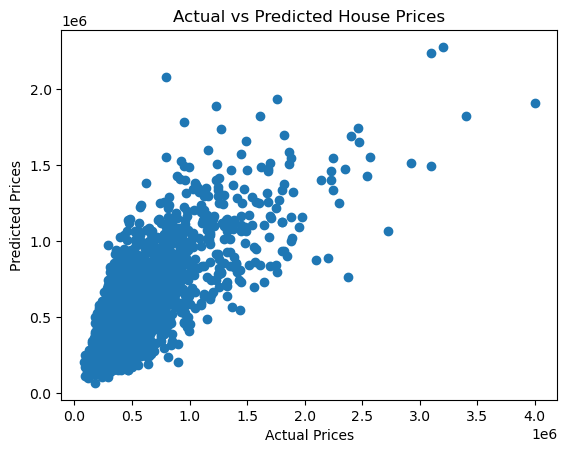

In [33]:
# To Visualize results in Scatter plot

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

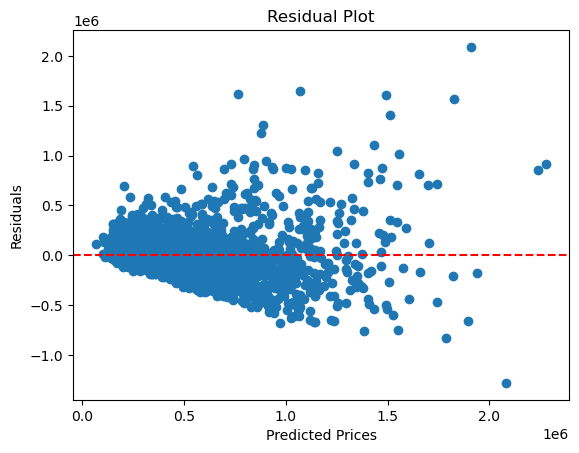

In [34]:
# to create a residual plot

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)

plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.axhline(y=0, color='r', linestyle='--')

plt.show()


In [35]:
#  To make output prediction:
Y_prediction = model.predict(X)
Y_prediction[0:5]   

array([797545.26409495, 646027.16378555, 819715.07509925, 733432.57123527,
       694751.0405002 ])